## Object Detection 
- Localize the main shopping object

In [5]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [6]:
polyvore_dir = '/Users/ranjeetsingh/Desktop/visual search/polyvore_outfits'
# Load the TensorFlow Hub object detection model
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Define the custom object detection function
def tensorflow_hub_object_detection(img):
    # Convert image to a NumPy array if needed and ensure it's of type uint8
    img_tensor = tf.convert_to_tensor(np.asarray(img), dtype=tf.uint8)
    img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dimension

    # Perform object detection
    result = detector(img_tensor)

    # Extract detection results
    boxes = result["detection_boxes"].numpy()[0]  # Bounding boxes
    scores = result["detection_scores"].numpy()[0]  # Confidence scores
    classes = result["detection_classes"].numpy()[0].astype(np.int32)  # Class IDs

    # Filter results based on a score threshold
    score_threshold = 0.5
    valid_indices = scores > score_threshold
    boxes = boxes[valid_indices]
    scores = scores[valid_indices]
    classes = classes[valid_indices]

    return boxes, classes, scores

# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, scores, classes, class_labels):
    draw = ImageDraw.Draw(image)
    width, height = image.size

    for i, box in enumerate(boxes):
        ymin, xmin, ymax, xmax = box
        left, right, top, bottom = xmin * width, xmax * width, ymin * height, ymax * height
        draw.rectangle([(left, top), (right, bottom)], outline="red", width=3)
        label = f"{class_labels[classes[i]]}: {scores[i]:.2f}"
        draw.text((left, top), label, fill="red")
    return image

# Test the function with a sample image
# Full COCO class label map
class_labels = {
    1: "person", 2: "bicycle", 3: "car", 4: "motorcycle", 5: "airplane",
    6: "bus", 7: "train", 8: "truck", 9: "boat", 10: "traffic light",
    11: "fire hydrant", 13: "stop sign", 14: "parking meter", 15: "bench",
    16: "bird", 17: "cat", 18: "dog", 19: "horse", 20: "sheep", 21: "cow",
    22: "elephant", 23: "bear", 24: "zebra", 25: "giraffe", 27: "backpack",
    28: "umbrella", 31: "handbag", 32: "tie", 33: "suitcase", 34: "frisbee",
    35: "skis", 36: "snowboard", 37: "sports ball", 38: "kite", 39: "baseball bat",
    40: "baseball glove", 41: "skateboard", 42: "surfboard", 43: "tennis racket",
    44: "bottle", 46: "wine glass", 47: "cup", 48: "fork", 49: "knife",
    50: "spoon", 51: "bowl", 52: "banana", 53: "apple", 54: "sandwich",
    55: "orange", 56: "broccoli", 57: "carrot", 58: "hot dog", 59: "pizza",
    60: "donut", 61: "cake", 62: "chair", 63: "couch", 64: "potted plant",
    65: "bed", 67: "dining table", 70: "toilet", 72: "tv", 73: "laptop",
    74: "mouse", 75: "remote", 76: "keyboard", 77: "cell phone", 78: "microwave",
    79: "oven", 80: "toaster", 81: "sink", 82: "refrigerator", 84: "book",
    85: "clock", 86: "vase", 87: "scissors", 88: "teddy bear", 89: "hair drier",
    90: "toothbrush"
}

def test():
    # Load an image
    img_path = os.path.join(polyvore_dir,'test_images/test_image.jpg')
    img = Image.open(img_path).convert("RGB")
    
    # Run the object detection function
    boxes, classes, scores = tensorflow_hub_object_detection(img)
    
    # Visualize the results
    img_with_boxes = draw_boxes(img, boxes, scores, classes, class_labels)
    plt.imshow(img_with_boxes)
    plt.axis("off")
    plt.show()

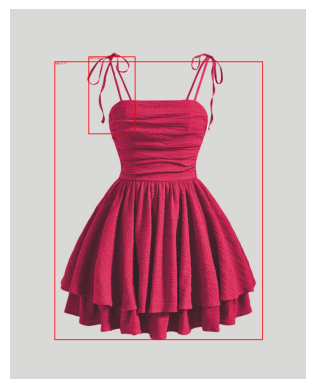

In [7]:
# Run the test
test()